# Analyzing the epidemiological outbreak of COVID-19

This project is forked from and inspired by RMOTR's Data Science project on COVID-19. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
import chart_studio.plotly as py
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.io as pio
print(pio.renderers)
#make plotly work with jupyter notebook
po.init_notebook_mode(connected=True) 

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']



## Reading data

The COVID-19 data is loaded from the github page [2019-Novel Coronavirus Data Repository](https://github.com/CSSEGISandData/COVID-19) by John Hopkins University Center for Systems Science and Engineering. It is also supported by the ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

The data is collated from multiple sources over the world and is updated daily. As a result, we can get up to date information by reloading the data everyday.

The data we are interested in is - COVID-19_confirmed_global, COVID_19_deaths_global, COVID_19_recovered_global.

Let's load the data and look at some of its columns.

In [107]:
#raw.githubusercontent.com returns the raw content of the file stored in github. This can be found by clicking the RAW button on the github page
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)
print(covid_confirmed.shape)
display(covid_confirmed.head(10))

(256, 74)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032


In [3]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths  = pd.read_csv(COVID_DEATHS_URL)
print(covid_deaths.shape)
display(covid_deaths.head(10))

(256, 74)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,3,3,3,6,8,12
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,4,4,6,8,9,13,18,19,23,27
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,0,0,0,0,1,1,1,3,3,3
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,6,6,7,7,7,7,8,8,8,8


In [4]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)
print(covid_recovered.shape)
display(covid_recovered.head(10))

(242, 74)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,5
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,10,17,17,31,31,33,44,52
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,65,24,65,29,29,31,31,37,46
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3,3,52,52,63,72,72,72,228,240
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,2,2,14,16,18,28,30,30,30,30
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,1,1,2,2,2,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


The dataframes contain info about confirmed cases of COVID-19 as well as deaths and recovered cases in various regions of the world.

## Exploratory Data Analysis

Lets check for missing values in the dataframes.

In [5]:
covid_confirmed.isna().sum()[covid_confirmed.isna().sum() != 0]

Province/State    177
dtype: int64

In [6]:
covid_deaths.isna().sum()[covid_deaths.isna().sum() != 0]

Province/State    177
dtype: int64

In [7]:
covid_recovered.isna().sum()[covid_recovered.isna().sum() != 0]

Province/State    178
dtype: int64

About 74% of the Province/State columns have missing values. The column could be ignored but it contains important stae/province information of some countries, especially China. Instead we will replace the NaN with an empty value.

In [8]:
covid_confirmed.fillna(value='', inplace=True)
covid_deaths.fillna(value='', inplace=True)
covid_recovered.fillna(value='', inplace=True)

In [9]:
#check to make sure no NaN values
print(covid_confirmed.isna().sum().sum())
print(covid_deaths.isna().sum().sum())
print(covid_recovered.isna().sum().sum())

0
0
0


#### Total number of cases over the world
Lets check the total number of COVID-19 cases in the world as of yesterday. This data is stored in the last column of the dataframes.

In [10]:
world_confirmed = covid_confirmed.iloc[:,(covid_confirmed.shape[1]-1)].sum()
world_deaths = covid_deaths.iloc[:, (covid_deaths.shape[1]-1)].sum()
world_recovered = covid_recovered.iloc[:,(covid_recovered.shape[1]-1)].sum()

In [11]:
print('Total number of confirmed cases of COVID-19 in the world as of {}: {}' .format(covid_confirmed.columns[-1],world_confirmed))
print('Total number of deaths due to COVID-19 as of {}: {}' .format(covid_deaths.columns[-1],world_deaths))
print('Total number recovered as of {}: {}' .format(covid_recovered.columns[-1],world_recovered))

Total number of confirmed cases of COVID-19 in the world as of 3/31/20: 857487
Total number of deaths due to COVID-19 as of 3/31/20: 42107
Total number recovered as of 3/31/20: 178034


Based on the above data we can calculate the active cases -
$$ active = confirmed - deaths - recovered $$
        

In [12]:
world_active = world_confirmed - world_deaths - world_recovered
world_active

637346

Lets save the world data in a dataframe and plot it using plotly's treemap.

In [20]:
world_cases = {
    'Confirmed': world_confirmed,
    'Deaths': world_deaths,
    'Recovered': world_recovered,
    'Active': world_active
}
world_cases = pd.DataFrame([world_cases])
world_cases

,Confirmed,Deaths,Recovered,Active
0,857487,42107,178034,637346


In [21]:
world_cases_long = world_cases.melt(value_vars=['Active', 'Deaths', 'Recovered'], value_name='count', var_name='status')
world_cases_long['path0'] = 'Confirmed' #in order to have a single root node or path for the treemap
world_cases_long

,status,count,path0
0,Active,637346,Confirmed
1,Deaths,42107,Confirmed
2,Recovered,178034,Confirmed


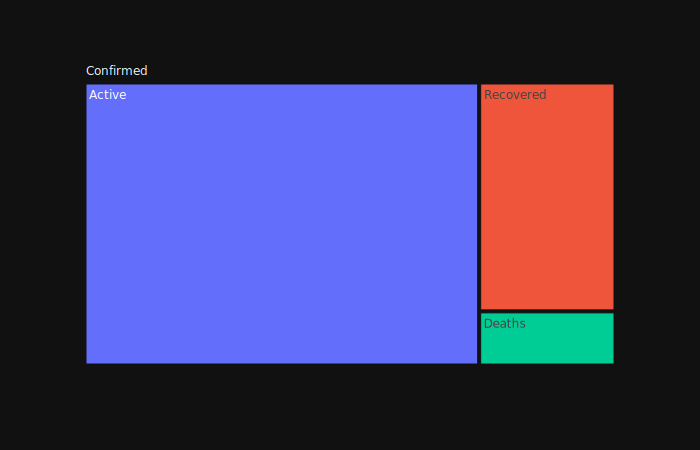

In [22]:
fig = px.treemap(world_cases_long, path=['path0', 'status'], values='count', template='plotly_dark' )
#po.iplot(fig)

fig.show(renderer = 'svg')

We can see that the majority (over 74%) of the cases are still active. 

#### Time versus total cases

Lets plot the growth of COVID-19 with time over the world. 

In [16]:
#calculate total cases for each column 
covid_confirmed_time = covid_confirmed.iloc[:, 4:].sum()
covid_time = pd.DataFrame(covid_confirmed_time).reset_index()
covid_time = covid_time.rename(columns= {'index': 'date', 0: 'confirmed'})

deaths_total = covid_deaths.iloc[:, 4:].sum()
recovered_total = covid_recovered.iloc[:, 4:].sum()

covid_time['deaths'] = deaths_total.values
covid_time['recovered']  = recovered_total.values

#also calculate the active cases using the previous equation
covid_time['active'] = covid_time['confirmed'] - covid_time['deaths'] - covid_time['recovered']

display(covid_time)

,date,confirmed,deaths,recovered,active
0,1/22/20,555,17,28,510
1,1/23/20,654,18,30,606
2,1/24/20,941,26,36,879
3,1/25/20,1434,42,39,1353
4,1/26/20,2118,56,52,2010
...,...,...,...,...,...
65,3/27/20,593291,27198,130915,435178
66,3/28/20,660706,30652,139415,490639
67,3/29/20,720117,33925,149082,537110
68,3/30/20,782365,37582,164566,580217


In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['confirmed'], mode = 'lines+markers', name='Confirmed'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['active'], mode = 'lines+markers', name='Active'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['recovered'], mode = 'lines+markers', name='Recovered'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['deaths'], mode = 'lines+markers', name='Deaths'))
fig.update_layout(template = 'plotly_dark', title = 'Worldwide cases over time', )
fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Number of Cases')
fig.show()

The growth rate of confirmed cases is exponential. It is hard to say if the rate is slowing down. Lets compare recovery vs mortality over time by calculating its ratios wrt to the confirmed cases.

In [25]:
covid_time['death_ratio'] = covid_time['deaths'] / covid_time['confirmed']
covid_time['recovered_ratio'] = covid_time['recovered'] / covid_time['confirmed']
covid_time

,date,confirmed,deaths,recovered,active,death_ratio,recovered_ratio
0,1/22/20,555,17,28,510,0.030631,0.050450
1,1/23/20,654,18,30,606,0.027523,0.045872
2,1/24/20,941,26,36,879,0.027630,0.038257
3,1/25/20,1434,42,39,1353,0.029289,0.027197
4,1/26/20,2118,56,52,2010,0.026440,0.024551
...,...,...,...,...,...,...,...
65,3/27/20,593291,27198,130915,435178,0.045843,0.220659
66,3/28/20,660706,30652,139415,490639,0.046393,0.211009
67,3/29/20,720117,33925,149082,537110,0.047110,0.207025
68,3/30/20,782365,37582,164566,580217,0.048036,0.210344


In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_time['date'], y=covid_time['recovered_ratio'], mode='lines+markers', name='Recovery Ratio'))
fig.add_trace(go.Scatter(x=covid_time['date'], y=covid_time['death_ratio'], mode='lines+markers', name='Mortality Ratio'))
fig.update_layout(template = 'plotly_dark', title = 'Recovery and Mortality Ratios Over Time')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Ratio')
fig.show()

The recovery rate was increasing and mortality was constant until the first week of March. After that, there has been a drop in the recovery and death rates have increased by 1%. This coincides with the spread of COVID-19 in Europe and North America where death tolls in areas like Italy and Spain have surpassed China.

### Visualizing worldwide cases on a map

To visualize confirmed cases on the world map we will make some changes to the dataframe. The data will be grouped by the 'country/region' column and all the cases will be added to get the total count. To get the correct latitude and longitude information, we will seperate the two columns from the rest and calculate its mean (when grouped by the country). Finally, we will reset the index to get a new dataframe grouped by country that will be converted to a 'long format' for use by plotly.

In [67]:
covid_confirmed_loc_country = covid_confirmed[['Country/Region','Lat', 'Long']].groupby(by ='Country/Region').mean()
covid_confirmed_loc_country.head(10)

,Lat,Long
Country/Region,,
Afghanistan,33.000000,65.000000
Albania,41.153300,20.168300
Algeria,28.033900,1.659600
Andorra,42.506300,1.521800
Angola,-11.202700,17.873900
Antigua and Barbuda,17.060800,-61.796400
Argentina,-38.416100,-63.616700
Armenia,40.069100,45.038200
Australia,-31.996188,141.232788


In [68]:
covid_confirmed_split = covid_confirmed.drop(columns=['Lat', 'Long'])
covid_confirmed_tot_country = covid_confirmed_split.groupby(by = 'Country/Region').sum()
covid_confirmed_tot_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
Albania,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
Algeria,0,0,0,0,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
Andorra,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
Angola,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7
Argentina,0,0,0,0,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054
Armenia,0,0,0,0,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532
Australia,0,0,0,0,4,5,5,6,9,9,...,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559


In [110]:
#join the dataframes to get all information in one
covid_confirmed_grouped_country = covid_confirmed_loc_country.join(covid_confirmed_tot_country)
covid_confirmed_grouped_country.reset_index(inplace = True)

In [111]:
covid_confirmed_grouped_country.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532
8,Australia,-31.996188,141.232788,0,0,0,0,4,5,5,...,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559
9,Austria,47.516200,14.550100,0,0,0,0,0,0,0,...,3582,4474,5283,5588,6909,7657,8271,8788,9618,10180


In [112]:
#change the dataframe to a long format
covid_confirmed_grouped_country = covid_confirmed_grouped_country.melt(id_vars=['Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Count')

In [113]:
covid_confirmed_grouped_country[covid_confirmed_grouped_country['Country/Region'] == 'Spain']

,Country/Region,Lat,Long,Date,Count
153,Spain,40.0,-4.0,1/22/20,0
333,Spain,40.0,-4.0,1/23/20,0
513,Spain,40.0,-4.0,1/24/20,0
693,Spain,40.0,-4.0,1/25/20,0
873,Spain,40.0,-4.0,1/26/20,0
...,...,...,...,...,...
11853,Spain,40.0,-4.0,3/27/20,65719
12033,Spain,40.0,-4.0,3/28/20,73235
12213,Spain,40.0,-4.0,3/29/20,80110
12393,Spain,40.0,-4.0,3/30/20,87956


In [101]:
fig = px.scatter_geo(covid_confirmed_grouped_country, 
                     lat ='Lat', lon = 'Long', size = 'Count', hover_name= 'Country/Region', 
                     size_max = 50, animation_frame = 'Date', projection='natural earth'
                    )
fig.update_layout(template = 'plotly_dark', title = 'Worldwide Confirmed Cases')
fig.show()